In [1]:
# Importamos librerías

%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy.stats as ss
import warnings
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

import category_encoders as ce


In [22]:
df_original = pd.read_csv("NCDB_1999_to_2014.csv",na_values=["UU", "XX", "U", "X", "QQ", "Q", "NNNN", "UUUU", "XXXX", "NN", "N" ] )


Cojo todos los años ya que no cambia mucho ni tarda demasiado


In [ ]:
df=df_original

Lo unico aqui seria que los QQ, Q no tienen que ser NA sino un nuevo valor que puede ser 0 por ejemplo. O en P_ISEV que valga 0 tambien. Que esto eswta hecho con lo del otro pero me danba error. Solo lo haria con el P_SAFE ya que es elq ue tiene mas missings y tiene sentido, con el P_ISEV si quereis tmbn. Pero para el resto todos los  QQ,UUU etc se pdoria dejar como missings normales. No creo influya demasiado en pcrear dummies o lo que sea

In [4]:
def NA(data):
    null_sum = data.isnull().sum()
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    df_NA = pd.concat([total, percent], axis=1, keys=['NA', '% NA'])
    
    
    
    return df_NA

In [23]:
NA(df_original)

,NA,% NA
P_SAFE,1234284,21.06
C_RCFG,648946,11.07
V_YEAR,584378,9.97
C_CONF,463999,7.92
C_RALN,463312,7.91
P_AGE,395156,6.74
P_ISEV,371412,6.34
C_TRAF,305501,5.21
V_TYPE,283111,4.83
P_SEX,249740,4.26


Vamos a imputar los missings de "P_SAFE", "C_RCFG", "V_YEAR", "C_CONF", "C_RALN", "P_AGE", "P_ISEV", "C_TRAF", "V_TYPE", "C_RSUR", "P_USER", "C_WTHR", "P_PSN", "C_HOUR". Y luego los missings de 'P_ID' 'V_ID','C_WDAY','C_VEHS','C_MNTH' los quitaremos pq son muy pocos y no influye

# Codificación de variables.

In [5]:

from sklearn.impute import SimpleImputer
sim_imp = SimpleImputer(strategy='most_frequent')
columnas_most_frequent=["P_USER","P_AGE","C_HOUR","C_WTHR","P_PSN"]
for i in columnas_most_frequent:
    df[i]=sim_imp.fit_transform(df[i].values.reshape(-1,1))

In [6]:
NA(df)

,NA,% NA
P_SAFE,1234284,21.06
C_RCFG,648946,11.07
V_YEAR,584378,9.97
C_CONF,463999,7.92
C_RALN,463312,7.91
P_ISEV,371412,6.34
C_TRAF,305501,5.21
V_TYPE,283111,4.83
P_SEX,249740,4.26
C_RSUR,248668,4.24


In [7]:

columnas_media = ["P_SAFE", "C_RCFG", "V_YEAR", "C_CONF", "C_RALN", "P_AGE", "P_ISEV", "C_TRAF", "V_TYPE", "C_RSUR", "P_USER", "C_WTHR", "P_PSN", "C_HOUR"]
for i in columnas_media:
     df[i] = df[i].fillna( int(df[i].mean()) )

In [8]:
NA(df)

,NA,% NA
P_SEX,249740,4.26
P_ID,10992,0.19
C_WDAY,1323,0.02
C_VEHS,544,0.01
V_ID,433,0.01
C_MNTH,385,0.01
C_YEAR,0,0.00
V_TYPE,0,0.00
P_SAFE,0,0.00
P_ISEV,0,0.00


Quitamos los que quedan

In [9]:
df=df.dropna()

In [10]:
NA(df)

,NA,% NA
C_YEAR,0,0.0
C_MNTH,0,0.0
P_SAFE,0,0.0
P_ISEV,0,0.0
P_PSN,0,0.0
P_AGE,0,0.0
P_SEX,0,0.0
P_ID,0,0.0
V_YEAR,0,0.0
V_TYPE,0,0.0


VAmos a porceder a hacer analisis descriptivo.

In [11]:
mortalidad_posible=df['C_SEV'].unique()
mortalidad_posible

array([2, 1], dtype=int64)

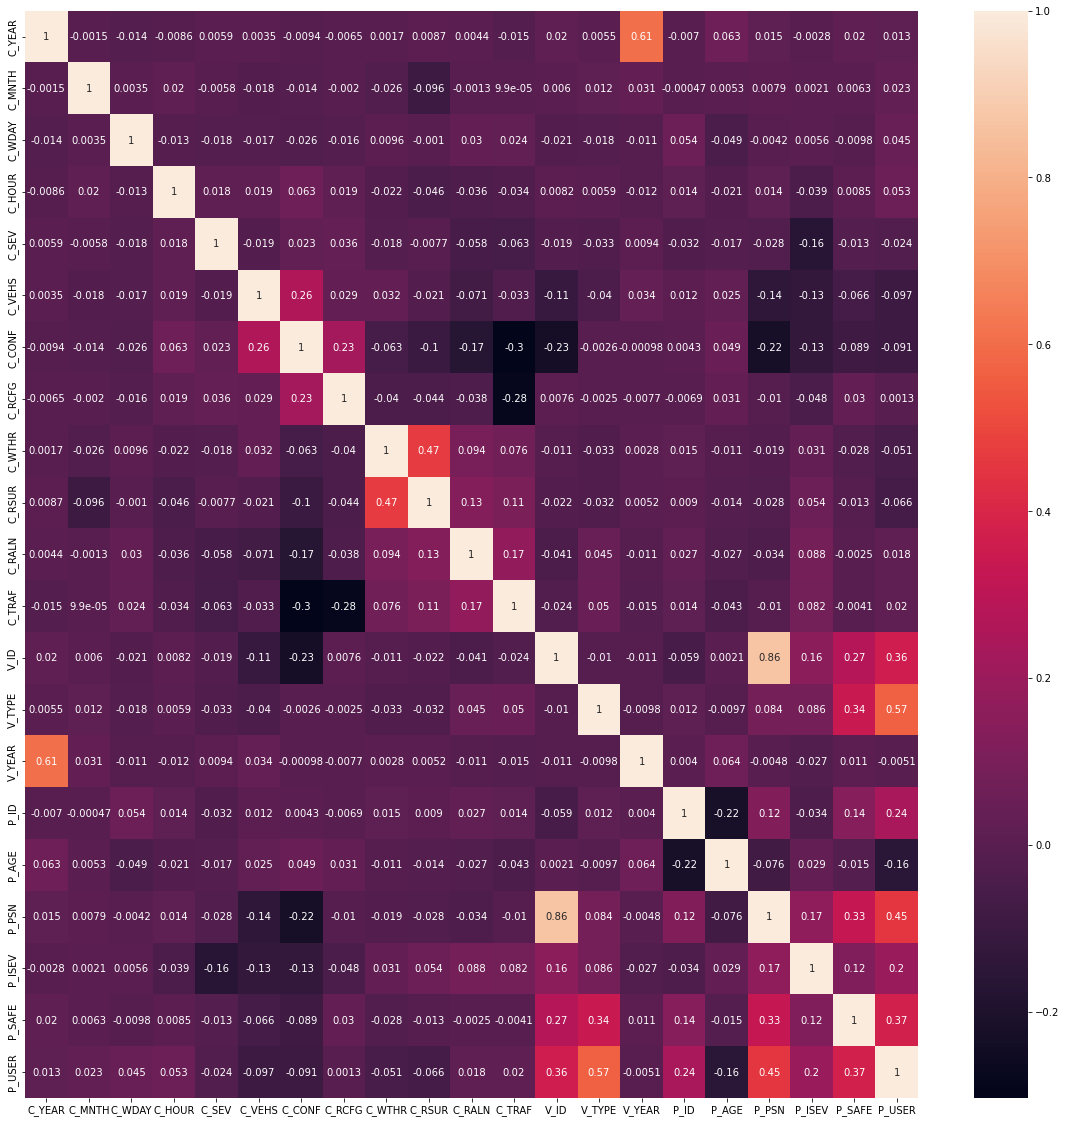

In [12]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

<AxesSubplot:>

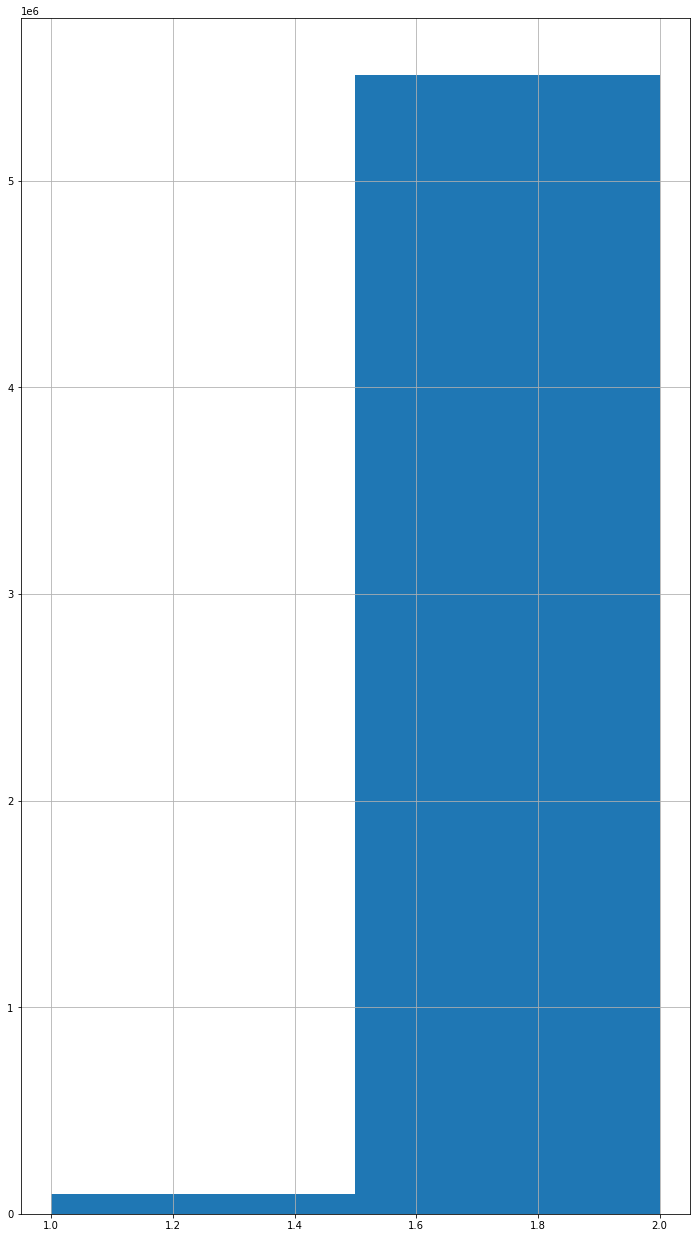

In [13]:
df['C_SEV'].hist(bins=2,figsize=(12,22))

Podemos observar que hay muchos mas accidentes nomortales que mortales. Por lo tanto nuestros datos estan desbalanceados ya que en nuestro analisis queremos determinar si el accidnete va a ser mortal o no. Vamos a ver la cantidad de accidentes por dia, mes tiempo atomosferico.

In [14]:
num = [0, 1, 2, 3, 4, 5, 6]
w_days = df['C_WDAY']
w_days = w_days.sort_values()
w_days = w_days.replace({1:"Lunes", 2:"Marte", 3:"Miercoles", 4:"Jueves", 5:"Viernes", 6:"Sabado", 7:"Domingo" })
h_days = df['C_HOUR']
h_days = h_days.sort_values()
weath_cond = df['C_WTHR']
weath_cond = weath_cond.replace({1:"Sunny", 2: "Overcast", 3:"Raining", 4:"Snowing", 5:"Freezing Rain", 6:"Visibility limitation (snow, fog, etc..)", 7: "Strong wind" })
road_cond = df['C_RSUR']
road_cond = road_cond.replace({1:"Dry,normal", 2:"Wet", 3:"Snow", 4:"Slush, wet snow", 5:"Icy", 6:"Sand/gravel/dirt", 7:"Muddy", 8:"Oil", 9:"Flooded"})
month_acc = df['C_MNTH']
month_acc = month_acc.sort_values()
month_acc = month_acc.replace({1:"ENE", 2:"FEB", 3:"MAR", 4:"ABR", 5:"MAY", 6:"JUN", 7:"JUL", 8:"AGO", 9:"SEP", 10:"OCT", 11:"NOV", 12:"DIC",0:"Missing"})

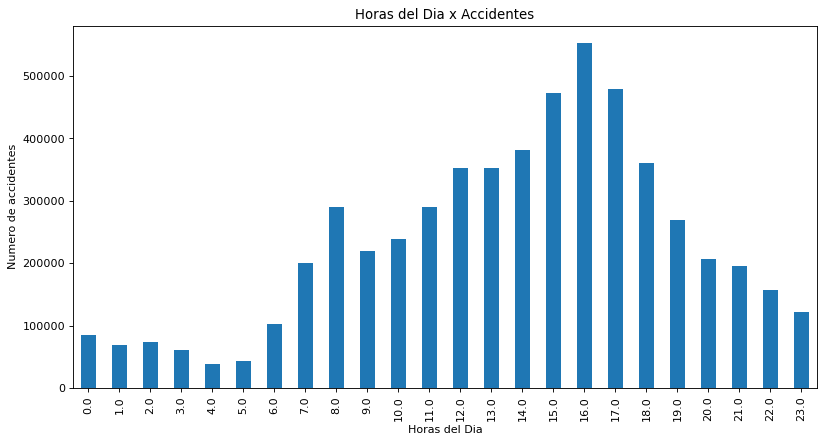

In [15]:
fig2 = plt.figure(figsize=(12, 6), dpi= 80)

ax2 = h_days.value_counts().sort_index().plot.bar()
ax2.set_xlabel("Horas del Dia")
ax2.set_ylabel("Numero de accidentes")
plt.title("Horas del Dia x Accidentes")
plt.show()

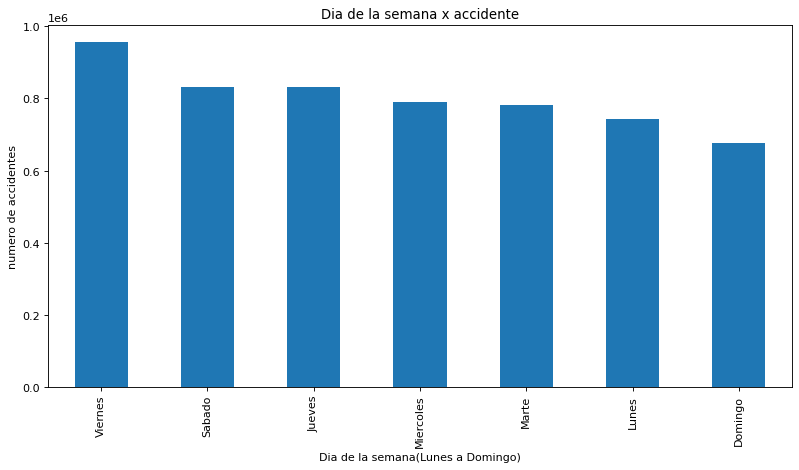

In [16]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = w_days.value_counts().plot.bar()
ax3.set_xlabel("Dia de la semana(Lunes a Domingo)")
ax3.set_ylabel("numero de accidentes")
plt.title("Dia de la semana x accidente")
plt.show()

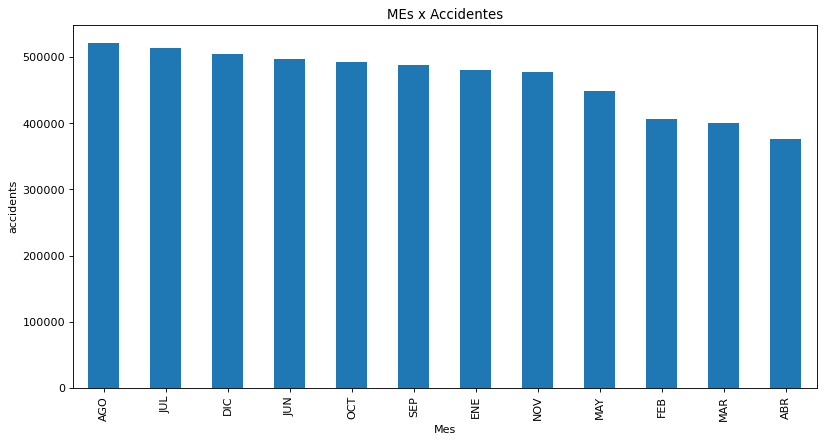

In [17]:
fig6 = plt.figure(figsize=(12, 6), dpi= 80)

ax6 = month_acc.value_counts().plot.bar()
ax6.set_xlabel("Mes")
ax6.set_ylabel("accidents")
plt.title("MEs x Accidentes")
plt.show()

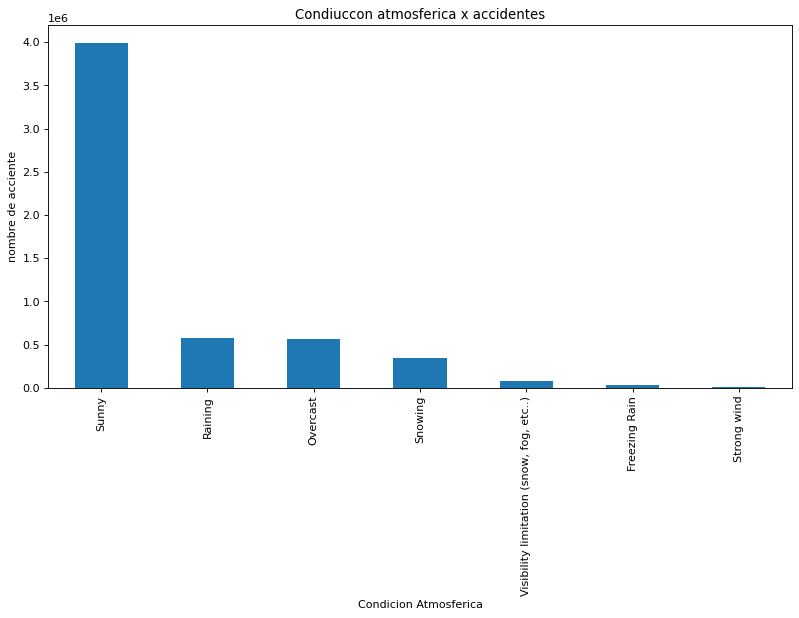

In [18]:
fig4 = plt.figure(figsize=(12, 6), dpi= 80)

ax4 = weath_cond.value_counts().plot.bar()
ax4.set_xlabel("Condicion Atmosferica")
ax4.set_ylabel("nombre de acciente")
plt.title("Condiuccon atmosferica x accidentes")
plt.show()

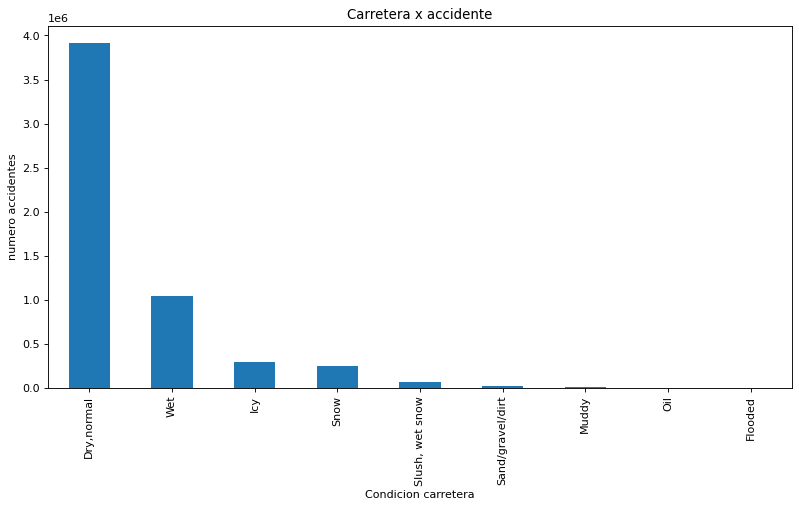

In [19]:
fig3 = plt.figure(figsize=(12, 6), dpi= 80)

ax3 = road_cond.value_counts().plot.bar()
ax3.set_xlabel("Condicion carretera")
ax3.set_ylabel("numero accidentes")
plt.title("Carretera x accidente")
plt.show()

In [87]:
df.dtypes

C_YEAR    int32
C_MNTH    int32
C_WDAY    int32
C_HOUR    int32
C_SEV     int32
C_VEHS    int32
C_CONF    int32
C_RCFG    int32
C_WTHR    int32
C_RSUR    int32
C_RALN    int32
C_TRAF    int32
V_ID      int32
V_TYPE    int32
V_YEAR    int32
P_ID      int32
P_SEX     int32
P_AGE     int32
P_PSN     int32
P_ISEV    int32
P_SAFE    int32
P_USER    int32
dtype: object

In [30]:
df["P_SEX"] = df["P_SEX"].replace({"F":"1", "M":"2"})

In [37]:
df.shape

(5608859, 22)

In [40]:
columnas_float=['C_YEAR', 'C_MNTH', 'C_WDAY', 'C_HOUR', 'C_SEV', 'C_VEHS', 'C_CONF', 'C_RCFG', 'C_WTHR', 'C_RSUR', 'C_RALN', 'C_TRAF', 'V_ID', 'V_TYPE', 'V_YEAR', 'P_ID', 'P_SEX', 'P_AGE', 'P_PSN', 'P_ISEV', 'P_SAFE', 'P_USER']
for i in columnas_float:
    df[i]=df[i].astype(int)

# Preparar datps

Hay que hacer el undersampling para equilibarar los datos

In [42]:
from sklearn.preprocessing import MinMaxScaler
col=list(df.drop(['C_SEV'],axis=1).columns)
scaler = MinMaxScaler()
datos_escalados1 = scaler.fit_transform(df.drop(['C_SEV'],axis=1))
datos_escalados1 = pd.DataFrame(datos_escalados1,columns=col)
datos_escalados1.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,C_RALN,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,0.0,0.0,0.0,0.869565,0.013158,0.825,0.0,0.000000,0.50,0.4,...,0.000000,0.227273,0.780702,0.000000,1.0,0.408163,0.000000,0.0,0.083333,0.00
1,0.0,0.0,0.0,0.869565,0.013158,0.825,0.0,0.000000,0.50,0.4,...,0.010204,0.000000,0.754386,0.000000,1.0,0.183673,0.000000,0.0,0.083333,0.00
2,0.0,0.0,0.0,0.869565,0.013158,0.825,0.0,0.000000,0.50,0.4,...,0.010204,0.000000,0.754386,0.010204,0.0,0.193878,0.022727,0.5,0.083333,0.25
3,0.0,0.0,0.0,0.347826,0.000000,0.000,0.0,0.666667,0.25,1.0,...,0.000000,0.000000,0.745614,0.000000,1.0,0.459184,0.000000,0.0,0.083333,0.00
4,0.0,0.0,0.0,0.347826,0.000000,0.000,0.0,0.666667,0.25,1.0,...,1.000000,0.045455,0.850877,0.000000,1.0,0.040816,1.000000,0.5,0.083333,0.50


In [43]:
datos_escalados1=datos_escalados1.reset_index(drop=True)
accidente=pd.DataFrame(df['C_SEV'],columns=['C_SEV'])
accidente=accidente.reset_index(drop=True)
datos_escalados1=pd.concat([datos_escalados1,accidente],axis=1)

Filas que nos quedamos: 191364


<AxesSubplot:>

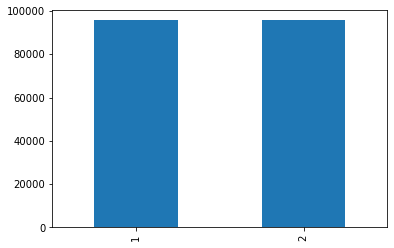

In [44]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_1,y_1=rus.fit_resample(datos_escalados1, datos_escalados1[['C_SEV']].values)
print('Filas que nos quedamos:', len(rus.sample_indices_))
indicadores_undersampled = df.iloc[rus.sample_indices_]
indicadores_undersampled['C_SEV'].value_counts().plot.bar()

In [45]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1.astype(float), y_1.astype(int), test_size=0.25, random_state=0, stratify=y_1)#ramdomstate es como la semilla
print(X_train_1.shape, X_test_1.shape,y_train_1.shape, y_test_1.shape)

(143523, 22) (47841, 22) (143523,) (47841,)


# REG Log

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [78]:
from sklearn.model_selection import GridSearchCV

vectorC = np.logspace(-2,2,10)
param_grid = {'C': vectorC }
logreg=LogisticRegression(random_state=2,solver='liblinear')
grid = GridSearchCV(logreg,
                    scoring='accuracy', 
                    param_grid=param_grid, 
                    cv = 10,n_jobs=-1)

grid.fit(X_train_1, y_train_1)


GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=2, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02])},
             scoring='accuracy')

best mean cross-validation score: 1.000
best parameters: {'C': 0.01}


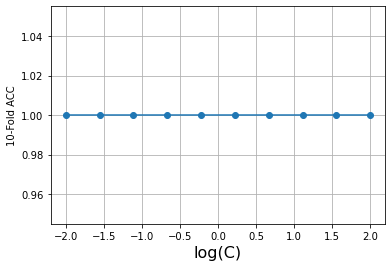

In [79]:
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC),scores,yerr=std_scores, fmt='o-',ecolor='g')
plt.xlabel('log(C)',fontsize=16)
plt.ylabel('10-Fold ACC')
plt.grid()
plt.show()

In [80]:
Copt = grid.best_params_['C']

lr = LogisticRegression(random_state=0, C = Copt, class_weight='liblinear').fit(X_train_1,y_train_1)
y_pred = lr.predict(X_test_1)

In [81]:
reg=LogisticRegression(solver='newton-cg',max_iter=100)
DatosRL = reg.fit(X_train_1, y_train_1)
predRL = reg.predict(X_test_1)
prob_pred = reg.predict_proba(X_test_1)

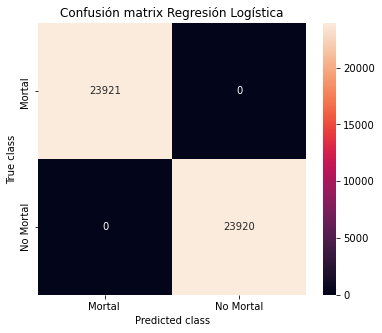

In [82]:
conf_matrix= confusion_matrix(y_test_1, predRL)
plt.figure(figsize=(6,5))
labels= ['Mortal ', 'No Mortal']
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot= True, fmt='d')
plt.title('Confusión matrix Regresión Logística')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [63]:
print('Pr lo tanto nuestra tasa de acierto: ', accuracy_score(predRL, y_test_1))

Pr lo tanto nuestra tasa de acierto:  1.0


Precision recall f1

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, predRL))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     23921
           2       1.00      1.00      1.00     23920

    accuracy                           1.00     47841
   macro avg       1.00      1.00      1.00     47841
weighted avg       1.00      1.00      1.00     47841



Curva ROC

In [55]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test_1, prob_pred[:,1])
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='red',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

## Arboles decision

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [89]:
mf=list(range(1, 25))
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
arbol = DecisionTreeClassifier(random_state=0)

# Definimos la rejilla
md = np.linspace(1, 2, 10)
h_parameters = {'max_depth':md,
               "max_features":mf}


cv = GridSearchCV(arbol, h_parameters, cv=10, n_jobs=-1, scoring='accuracy')


cv.fit(X_train_1, y_train_1)

ValueError: 
All the 2400 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 238, in fit
    check_scalar(
  File "C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1452, in check_scalar
    raise TypeError(
TypeError: max_depth must be an instance of int, not float64.


In [ ]:
cv.best_estimator_

In [ ]:
arbol = DecisionTreeClassifier(max_depth=2, max_features=17, random_state=0)
arbol.fit(X_train_1,y_train_1)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = arbol.predict(X_test_1)
accuracy_score(y_pred,y_test_1)

In [ ]:
print(classification_report(y_test_1, y_pred))

In [ ]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(arbol);

In [ ]:
from sklearn.metrics import roc_curve, auc

ejex, ejey, _ = roc_curve(y_test_1, y_pred)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()